In [17]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/dd/73/dc25ca27a9960539ef984921b0d42368445b856ae0861c3acba542b9a39c/matplotlib-3.1.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c6/ea/e5474014a13ab2dcb5056608e0716c600c3d8a8bcffb10ed55ccd6a42eb0/kiwisolver-1.1.0-cp37-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c0/0c/fc2e007d9a992d997f04a80125b0f183da7fb554f1de701bbb70a8e7d479/pyparsing-2.4.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
import h5py
import voxelgrid as vx

In [2]:
train_point_cloud = h5py.File("train_point_clouds.h5", "r")

In [3]:
# with h5py.File("./Data/3d-mnist/train_point_clouds.h5", "r") as hf:    
a = train_point_cloud["0"]
b = train_point_cloud["1"]    
digit_a = (a["img"][:], a["points"][:], a.attrs["label"]) 
digit_b = (b["img"][:], b["points"][:], b.attrs["label"]) 

In [4]:
print(a["normals"])

<HDF5 dataset "normals": shape (25700, 3), type "<f8">


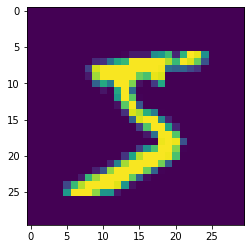

In [6]:
# Example to visualize one digit
# 0 is index the group 
# img is the key with values is the 2d array storing the image information
plt.imshow(digit_a[0])

In [7]:
# This gives us x, y, z coordinates of each 3d point in the point cloud making up the number in 3D space
print(digit_a[1])

[[ 0.15       -0.1094358   0.47305447]
 [ 0.15       -0.0969358   0.47305447]
 [ 0.15       -0.0844358   0.47305447]
 ...
 [ 0.15       -0.1094358  -0.50194553]
 [ 0.15       -0.1094358  -0.51444553]
 [ 0.15       -0.1094358  -0.52694553]]


In [8]:
# Label of the image
print(digit_a[2])

5


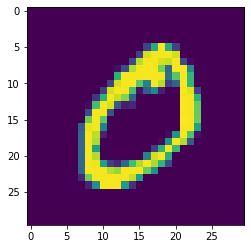

In [9]:
plt.imshow(digit_b[0])

In [10]:
print(digit_b[1].shape)

(26200, 3)


In [22]:
#  We split the grid into 16 segments along each axis resulting in a total of 4096 voxels
voxel_grid = vx.VoxelGrid(digit_a[1], x_y_z = [16, 16, 16])

In [26]:
# 2d array of all the points in the point cloud
voxel_grid.structure

array([[  10,    6,   15, 3946],
       [  10,    6,   15, 3946],
       [  10,    6,   15, 3946],
       ...,
       [  10,    6,    0,  106],
       [  10,    6,    0,  106],
       [  10,    6,    0,  106]])

Each row in the array above is a point in the point cloud, with each col is the segment position with respect to x, y, z and globally. For example: [10, 6, 15, 3946] means the point lies in the voxel that is at position 10 in x direction, 6 in y-direction and 15 in z direction.

In [69]:
# hf.keys() return a list of string representation of numbers 0, 1, 10, 1000,....4999
# hf.keys() return which datasets are available
# hf.values() return a list of hdf5 groups, each group has a set of keys and values
   # keys: 'img', 'normals', 'points'
   # values: hdf5 group "/0"
with h5py.File("./Data/3d-mnist/train_point_clouds.h5", "r") as hf:
    a = hf['0']
    print(type(a))

<class 'h5py._hl.group.Group'>
